In [28]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm, probplot
import statsmodels.api as sm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')
# # plt.style.use('ggplot')

In [29]:
#lendo informação obtida no site coinmarketcap.com
#current = pd.read_json('https://api.coinmarketcap.com/v1/ticker/') 
cmc_2017 = pd.read_csv("coinmarketcap_06122017.csv")
#imprimindo as primeiras linhas do dataset
cmc_2017.head(10)

Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0    9.007640e+09      1.672352e+07       bitcoin    1512549554   
1           1    1.551330e+09      9.616537e+07      ethereum    1512549553   
2           2    1.111350e+09      1.684044e+07  bitcoin-cash    1512549578   
3           3    2.936090e+09      2.779530e+09          iota    1512549571   
4           4    2.315050e+08      3.873915e+10        ripple    1512549541   
5           5    2.289430e+08      7.736420e+06          dash    1512549542   
6           6    4.093420e+08      5.415391e+07      litecoin    1512549542   
7           7    1.384070e+08      1.669097e+07  bitcoin-gold    1512549582   
8           8    5.498600e+08      1.544296e+07        monero    1512549544   
9           9    6.164750e+07      2.592707e+10       cardano    1512549579   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    2.130493e+11  2.100000e+07       Bitcoin               0.12   
1    4.352945e+10           NaN      Ethereum              -0.18   
2    2.529585e+10  2.100000e+07  Bitcoin Cash               1.65   
3    1.475225e+10  2.779530e+09          IOTA              -2.38   
4    9.365343e+09  1.000000e+11        Ripple               0.56   
5    5.794076e+09  1.890000e+07          Dash               1.22   
6    5.634498e+09  8.400000e+07      Litecoin              -0.17   
7    4.920065e+09  2.100000e+07  Bitcoin Gold              -0.86   
8    4.331688e+09           NaN        Monero              -2.00   
9    3.231420e+09  4.500000e+10       Cardano              -0.28   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \
0                7.33              17.45   1.000000  12739.500000     1   
1               -3.93              -7.33   0.036177    452.652000     2   
2               -5.51              -4.75   0.120050   1502.090000     3   
3               83.35             255.82   0.000424      5.307460     4   
4               -3.70             -14.79   0.000019      0.241754     5   
5               -3.31              10.64   0.059856    748.935000     6   
6                0.80               3.68   0.008316    104.046000     7   
7               -8.65             -11.24   0.023559    294.774000     8   
8               25.65              41.23   0.022418    280.496000     9   
9               -5.80              -8.25   0.000010      0.124635    10   

  symbol  total_supply  
0    BTC  1.672352e+07  
1    ETH  9.616537e+07  
2    BCH  1.684044e+07  
3  MIOTA  2.779530e+09  
4    XRP  9.999309e+10  
5   DASH  7.736420e+06  
6    LTC  5.415391e+07  
7    BTG  1.679097e+07  
8    XMR  1.544296e+07  
9    ADA  3.111248e+10

In [30]:
#realizando os mesmos passos feitos acima para 2018
cmc_2018 = pd.read_csv("coinmarketcap_06012018.csv")
cmc_2018.head(10)

Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0     22081300000          16785225       bitcoin    1515230661   
1           1      5221370000       38739144847        ripple    1515230641   
2           2      5705690000          96803840      ethereum    1515230649   
3           3      1569900000          16896225  bitcoin-cash    1515230652   
4           4       428305000       25927070538       cardano    1515230654   
5           5      2105240000          54637708      litecoin    1515230641   
6           6       146039000        8999999999           nem    1515230644   
7           7       656389000       17877794558       stellar    1515230643   
8           8      2971610000       65748192475          tron    1515230654   
9           9       194039000        2779530283          iota    1515230652   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    284909052105  2.100000e+07       Bitcoin              -0.42   
1    119207709132  1.000000e+11        Ripple              -0.26   
2    100115499075           NaN      Ethereum               0.29   
3     44424061657  2.100000e+07  Bitcoin Cash               0.03   
4     25916647856  4.500000e+10       Cardano               0.39   
5     16574020942  8.400000e+07      Litecoin               2.31   
6     14813369998           NaN           NEM              -1.82   
7     12634630726           NaN       Stellar               1.58   
8     11741640953           NaN          TRON              -1.80   
9     11143859582  2.779530e+09          IOTA              -3.03   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \
0                5.76              26.04   1.000000  16973.800000     1   
1               -9.23              24.15   0.000186      3.077190     2   
2               -1.04              45.01   0.062517   1034.210000     3   
3                7.99               2.81   0.158934   2629.230000     4   
4               -5.87              64.99   0.000060      0.999598     5   
5               22.26              32.85   0.018337    303.344000     6   
6               -2.53              69.65   0.000099      1.645930     7   
7               -4.94             110.28   0.000043      0.706722     8   
8              -12.63             434.36   0.000011      0.178585     9   
9                0.89              19.45   0.000242      4.009260    10   

  symbol  total_supply  
0    BTC      16785225  
1    XRP   99993093880  
2    ETH      96803840  
3    BCH      16896225  
4    ADA   31112483745  
5    LTC      54637708  
6    XEM    8999999999  
7    XLM  103570548975  
8    TRX  100000000000  
9  MIOTA    2779530283

In [31]:
# #juntando ambos os datasets --> NAO FAZ MUITO SENTIDO
# cmc = pd.merge(cmc_2017,cmc_2018,on="")
# cmc.head()

In [32]:
#listando as colunas do dataset
list(cmc_2017)

['Unnamed: 0',
 '24h_volume_usd',
 'available_supply',
 'id',
 'last_updated',
 'market_cap_usd',
 'max_supply',
 'name',
 'percent_change_1h',
 'percent_change_24h',
 'percent_change_7d',
 'price_btc',
 'price_usd',
 'rank',
 'symbol',
 'total_supply']

In [33]:
# cmc_2017["name"].value_counts(True)*100

In [34]:
# dfc = cmc_2017["name"].value_counts()
# dfc.plot(kind='bar', legend=False)
# GRAFICO ABSURDAMENTE PESADO

In [8]:
# Selecionando as colunas 'name' e 'market_cap_usd'
market_cap_2017 = cmc_2017[['name', 'market_cap_usd']]
market_cap_2018 = cmc_2018[['name', 'market_cap_usd']]

# Contando o número de valores de cada uma delas
market_cap_2017.count()

name              1326
market_cap_usd    1031
dtype: int64

nota-se que há mais ids que market caps!

In [9]:
# Filtrando as linhas sem um market capitalization
# market_cap = market_cap.query('market_cap_usd > 0')
market_cap_2017 = market_cap_2017[market_cap_2017["market_cap_usd"]>0]
market_cap_2018 = market_cap_2018[market_cap_2018["market_cap_usd"]>0]

# Contando o número de valores novamente
market_cap_2017.count()

name              1031
market_cap_usd    1031
dtype: int64

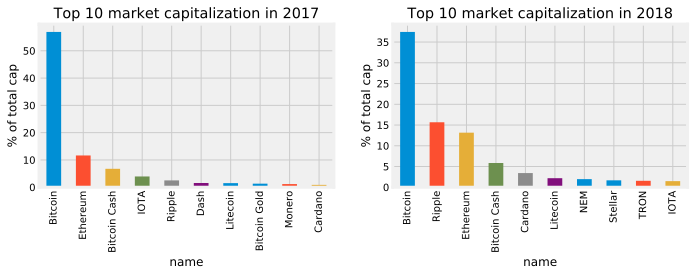

In [10]:
# Selecionando as 10 primeiras linhas e setando o index via nome da moeda
market_cap10_2017 = market_cap_2017.head(10).set_index('name')
market_cap10_2018 = market_cap_2018.head(10).set_index('name')

# Calculando porcentagem do market cap da moeda em relação ao total
market_cap10_2017 = market_cap10_2017.assign(market_cap_perc_2017 = lambda x: (x["market_cap_usd"] / market_cap_2017["market_cap_usd"].sum()) * 100)
market_cap10_2018 = market_cap10_2018.assign(market_cap_perc_2018 = lambda x: (x["market_cap_usd"] / market_cap_2018["market_cap_usd"].sum()) * 100)

# Plotando o gráfico de barras para analisar o tamanho que cada moeda tem no mercado de criptos
plt.figure(figsize=(16,3))
plt.subplot(131)
plot = market_cap10_2017.market_cap_perc_2017.plot.bar(title='Top 10 market capitalization in 2017')
plot.set_ylabel('% of total cap')

plt.subplot(132)
plot = market_cap10_2018.market_cap_perc_2018.plot.bar(title='Top 10 market capitalization in 2018')
plot.set_ylabel('% of total cap');

Se formos analisar as top 3 criptomoedas mais dominantes do mercado em ambos os anos, conseguimos perceber duas que foram recorrentes: BITCOIN E ETHEREUM.

In [11]:
# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
bitcoin_market_info.columns = bitcoin_market_info.columns.str.replace("*", "")
# look at the first few rows
bitcoin_market_info.head()


Date     Open     High      Low    Close      Volume   Market Cap
0 2018-11-24  4347.69  4413.09  3795.16  3880.76  4679500000  67495633205
1 2018-11-23  4360.70  4396.42  4195.68  4347.11  4871490000  75598851166
2 2018-11-22  4611.57  4629.64  4365.64  4365.94  4569370000  75919439809
3 2018-11-21  4465.54  4675.73  4343.98  4602.17  6120120000  80020171047
4 2018-11-20  4863.93  4951.61  4272.11  4451.87  8428290000  77401044320

In [12]:
# get market info for ethereum from the start of 2016 to the current day
ethereum_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
ethereum_market_info = ethereum_market_info.assign(Date=pd.to_datetime(ethereum_market_info['Date']))
# when Volume is equal to '-' convert it to 0
# ethereum_market_info.loc[ethereum_market_info['Volume']=="-",'Volume']=0
# convert to int
ethereum_market_info['Volume'] = ethereum_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
ethereum_market_info.columns = ethereum_market_info.columns.str.replace("*", "")
# look at the first few rows
ethereum_market_info.head()

Date    Open    High     Low   Close      Volume   Market Cap
0 2018-11-24  123.30  126.79  110.83  113.49  1800960000  11735901799
1 2018-11-23  126.42  127.03  119.56  123.30  1998010000  12747016419
2 2018-11-22  136.81  137.74  126.71  126.71  1792150000  13097009562
3 2018-11-21  131.14  138.89  125.76  136.70  2685930000  14127420909
4 2018-11-20  148.81  151.25  126.36  130.34  3134410000  13467303239

In [13]:
bitcoin_market_info['Close'].describe()

count     2037.000000
mean      2283.011546
std       3441.485215
min         68.430000
25%        320.510000
50%        597.150000
75%       2589.600000
max      19497.400000
Name: Close, dtype: float64

In [14]:
#bitcoin_market_info['Volume'].describe()

In [15]:
ethereum_market_info['Close'].describe()

count    1206.000000
mean      213.814170
std       278.559300
min         0.434829
25%         9.975000
50%        46.320000
75%       325.132500
max      1396.420000
Name: Close, dtype: float64

In [16]:
#ethereum_market_info['Volume'].describe()

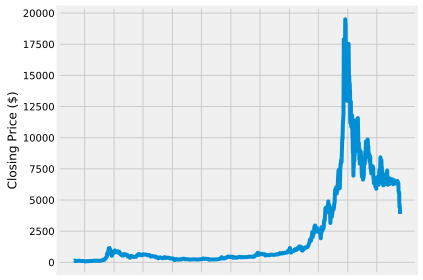

In [17]:
fig, ax1 = plt.subplots(1,1, gridspec_kw = {'height_ratios':[3]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['Close'])
fig.tight_layout()
plt.show()

In [18]:
Ouro = pd.read_excel('Preco.xlsx')
Ouro.head()

Data    USD$
0 2000-01-03  290.25
1 2000-01-04  281.50
2 2000-01-05  280.45
3 2000-01-06  279.40
4 2000-01-07  282.10

In [19]:
#Cruza as duas tabelas (bitcoin e ouro) via data
bitcoin_market_info.set_index('Date', inplace=True)
Ouro.set_index('Data', inplace=True)
df = bitcoin_market_info.join(Ouro)#, how='inner', lsuffix='_btc', rsuffix='_income')

In [20]:
df.tail()

Open    High     Low   Close  Volume  Market Cap     USD$
Date                                                                   
2013-05-02  116.38  125.60   92.28  105.21       0  1168517495  1469.25
2013-05-01  139.00  139.89  107.72  116.99       0  1298954594  1454.75
2013-04-30  144.00  146.93  134.05  139.00       0  1542813125  1469.00
2013-04-29  134.44  147.49  134.00  144.54       0  1603768865  1467.50
2013-04-28  135.30  135.98  132.10  134.21       0  1488566728      NaN

In [21]:
from math import log

def logaritmo(x):
    return log(x)

REGRESSÃO LINEAR SIMPLES

In [22]:
#Seleciona o preço final da moeda e do ouro, além de remover os NaNs

import math
# #Transforma a renda na escala de milhares de dólares
# df['2010_income'] /= 1000

df['Delta'] = df['Close']/df['Open']

simples = df[['Close','USD$','Delta']].dropna()

simples

Close     USD$     Delta
Date                                  
2018-11-09  6385.62  1211.40  0.991156
2018-11-08  6453.72  1224.15  0.989490
2018-11-07  6530.14  1229.95  1.009529
2018-11-06  6461.01  1231.60  1.004295
2018-11-05  6419.66  1232.25  1.008806
2018-11-02  6388.44  1232.10  1.001492
2018-11-01  6377.78  1231.15  1.009439
2018-10-31  6317.61  1214.95  0.996942
2018-10-30  6334.27  1225.40  0.999563
2018-10-29  6332.63  1230.80  0.975399
2018-10-26  6474.75  1233.85  1.000976
2018-10-25  6476.29  1230.80  0.998711
2018-10-24  6495.84  1230.55  1.002616
2018-10-23  6475.74  1235.95  1.000522
2018-10-22  6487.16  1222.30  1.000171
2018-10-19  6465.41  1227.85  0.998046
2018-10-18  6476.71  1223.00  0.989970
2018-10-17  6544.43  1229.05  0.993007
2018-10-16  6596.11  1230.70  0.999197
2018-10-15  6596.54  1229.95  1.048295
2018-10-12  6274.58  1219.75  1.005663
2018-10-11  6256.24  1205.55  0.949823
2018-10-10  6585.53  1188.60  0.991753
2018-10-09  6642.64  1185.55  0.998431
2018-10-08  6652.23  1186.95  1.007885
2018-10-05  6622.48  1203.80  1.007352
2018-10-04  6576.69  1203.45  1.012124
2018-10-03  6502.59  1201.20  0.992177
2018-10-02  6556.10  1204.70  0.994367
2018-10-01  6589.62  1189.35  0.995433
...             ...      ...       ...
2013-06-07   111.50  1386.00  0.937211
2013-06-06   118.00  1400.00  0.968007
2013-06-05   121.65  1404.00  1.002059
2013-06-04   121.42  1399.50  1.005632
2013-06-03   122.22  1402.50  0.997714
2013-05-31   129.00  1394.50  1.001553
2013-05-30   128.80  1413.50  0.973913
2013-05-29   132.30  1382.50  1.025581
2013-05-28   129.00  1376.50  0.994066
2013-05-27   129.74  1390.25  0.971835
2013-05-24   133.20  1390.25  1.054632
2013-05-23   126.70  1380.50  1.023425
2013-05-22   123.89  1408.50  1.008137
2013-05-21   122.88  1360.75  1.007048
2013-05-20   122.00  1354.75  0.995918
2013-05-17   123.01  1368.75  1.040606
2013-05-16   118.76  1381.00  1.039748
2013-05-15   114.22  1410.00  1.025314
2013-05-14   111.50  1433.75  0.945075
2013-05-13   117.98  1430.75  1.027521
2013-05-10   117.20  1426.50  1.039007
2013-05-09   112.67  1465.50  0.995318
2013-05-08   113.57  1468.00  1.036223
2013-05-07   111.50  1444.25  0.993318
2013-05-06   112.30  1469.25  0.968270
2013-05-03    97.75  1469.25  0.920000
2013-05-02   105.21  1469.25  0.904021
2013-05-01   116.99  1454.75  0.841655
2013-04-30   139.00  1469.00  0.965278
2013-04-29   144.54  1467.50  1.075126

[1445 rows x 3 columns]

In [23]:
simples['Close']=simples['Close'].apply(logaritmo)
simples['Delta']=simples['Delta'].apply(logaritmo)

simples

Close     USD$     Delta
Date                                   
2018-11-09  8.761804  1211.40 -0.008884
2018-11-08  8.772412  1224.15 -0.010566
2018-11-07  8.784184  1229.95  0.009484
2018-11-06  8.773541  1231.60  0.004286
2018-11-05  8.767120  1232.25  0.008768
2018-11-02  8.762245  1232.10  0.001491
2018-11-01  8.760575  1231.15  0.009395
2018-10-31  8.751096  1214.95 -0.003063
2018-10-30  8.753730  1225.40 -0.000437
2018-10-29  8.753471  1230.80 -0.024909
2018-10-26  8.775665  1233.85  0.000975
2018-10-25  8.775903  1230.80 -0.001290
2018-10-24  8.778917  1230.55  0.002613
2018-10-23  8.775818  1235.95  0.000522
2018-10-22  8.777580  1222.30  0.000171
2018-10-19  8.774222  1227.85 -0.001956
2018-10-18  8.775968  1223.00 -0.010081
2018-10-17  8.786370  1229.05 -0.007018
2018-10-16  8.794235  1230.70 -0.000803
2018-10-15  8.794301  1229.95  0.047165
2018-10-12  8.744262  1219.75  0.005647
2018-10-11  8.741335  1205.55 -0.051479
2018-10-10  8.792630  1188.60 -0.008281
2018-10-09  8.801265  1185.55 -0.001570
2018-10-08  8.802707  1186.95  0.007854
2018-10-05  8.798225  1203.80  0.007325
2018-10-04  8.791287  1203.45  0.012051
2018-10-03  8.779956  1201.20 -0.007854
2018-10-02  8.788151  1204.70 -0.005649
2018-10-01  8.793251  1189.35 -0.004577
...              ...      ...       ...
2013-06-07  4.714025  1386.00 -0.064847
2013-06-06  4.770685  1400.00 -0.032516
2013-06-05  4.801148  1404.00  0.002057
2013-06-04  4.799256  1399.50  0.005616
2013-06-03  4.805823  1402.50 -0.002288
2013-05-31  4.859812  1394.50  0.001552
2013-05-30  4.858261  1413.50 -0.026433
2013-05-29  4.885072  1382.50  0.025260
2013-05-28  4.859812  1376.50 -0.005951
2013-05-27  4.865532  1390.25 -0.028569
2013-05-24  4.891852  1390.25  0.053192
2013-05-23  4.841822  1380.50  0.023155
2013-05-22  4.819394  1408.50  0.008104
2013-05-21  4.811208  1360.75  0.007023
2013-05-20  4.804021  1354.75 -0.004090
2013-05-17  4.812266  1368.75  0.039803
2013-05-16  4.777105  1381.00  0.038978
2013-05-15  4.738126  1410.00  0.024999
2013-05-14  4.714025  1433.75 -0.056491
2013-05-13  4.770515  1430.75  0.027149
2013-05-10  4.763882  1426.50  0.038266
2013-05-09  4.724463  1465.50 -0.004693
2013-05-08  4.732419  1468.00  0.035582
2013-05-07  4.714025  1444.25 -0.006704
2013-05-06  4.721174  1469.25 -0.032244
2013-05-03  4.582413  1469.25 -0.083382
2013-05-02  4.655958  1469.25 -0.100902
2013-05-01  4.762088  1454.75 -0.172385
2013-04-30  4.934474  1469.00 -0.035339
2013-04-29  4.973556  1467.50  0.072438

[1445 rows x 3 columns]

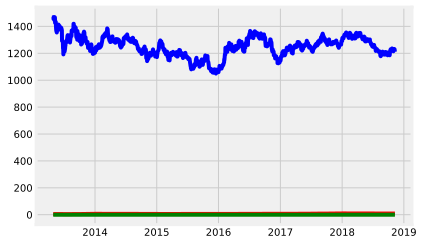

In [24]:
plt.plot(simples['Close'],'r')
plt.plot(simples['Delta'],'g')
plt.plot(simples['USD$'],'b')

In [25]:
x = simples['Close'] #preco do bitcoin
y = simples['USD$'] #preco do ouro
plt.scatter(x,y);
plt.xlabel("x: bitcoin closing");
plt.ylabel("y: gold value");

In [26]:
yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

beta0: 1195.1490965505918
beta1: 8.126938014847191


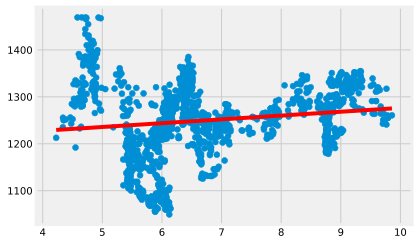

In [27]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y) # dados

In [136]:
# xc = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 3.485e+04
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:47:57   Log-Likelihood:                -2505.1
No. Observations:                1445   AIC:                             5012.
Df Residuals:                    1444   BIC:                             5018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
USD$           0.0054   2.88e-05    186.683      0.000       0.005       0.005
==============================================================================
Omnibus:                       33.688   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.363
Skew:                           0.196   Prob(JB):                     8.45e-06
Kurtosis:                       2.515   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);

ValueError: shapes (500,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)

In [122]:
#verificando normalidade dos resíduos
probplot(results.resid, dist="norm", plot=plt);

In [89]:
# bitcoin = bitcoin_market_info[::-1]
# x = bitcoin['Close'].values
# y = Ouro['USD$'][((len(Ouro['Data']))-(len(bitcoin['Date']))):len(Ouro['Data'])].values
# plt.scatter(x,y);
# plt.xlabel("x: bitcoin closing");
# plt.ylabel("y: gold value");

In [29]:
# y_ = y.mean()
# x_ = x.mean()

# Sxy = ((x -x_)*(y -y_)).sum()
# Sxx = ((x -x_)**2).sum()

# b1 = Sxy/Sxx
# b0 = y_ - b1*x_

# print("beta0: {0}".format(b0))
# print("beta1: {0}".format(b1))


In [30]:
# x_v = np.linspace(x.min(), x.max(), 500)
# y_v = b0 + b1*x_v

In [31]:
# plt.plot(x_v,y_v, color="r") # resultados da regressão
# plt.scatter(x, y); # dados

In [32]:
# ei = y - b0 
# ei

In [33]:
# probplot(ei, dist = "norm", plot = plt)

In [34]:
# xa = sm.add_constant(x)
# model = sm.OLS(y,xa)
# results = model.fit()
# results.summary()

In [35]:
# x_vc = sm.add_constant(x_v)
# y_vc = results.predict(x_vc)
# plt.plot(x_v, y_vc, color="r")
# plt.scatter(x,y);

REGRESSÃO LINEAR MÚLTIPLA

In [123]:
# Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

In [124]:
multipla = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'USD$']].dropna()

In [133]:
Y = multipla['USD$']
X = multipla[['Close']]

In [134]:
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   USD$   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     657.3
Date:                Sun, 25 Nov 2018   Prob (F-statistic):          8.95e-120
Time:                        11:21:33   Log-Likelihood:                -12086.
No. Observations:                1445   AIC:                         2.417e+04
Df Residuals:                    1444   BIC:                         2.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close          0.1703      0.007     25.637      0.000       0.157       0.183
==============================================================================
Omnibus:                      565.540   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1873.851
Skew:                          -1.985   Prob(JB):                         0.00
Kurtosis:                       6.919   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X3 = multipla[['Low',
       'Volume']]
results3 = regress(X3, Y)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   USD$   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     33.68
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           5.07e-15
Time:                        14:12:48   Log-Likelihood:                -8247.1
No. Observations:                1445   AIC:                         1.650e+04
Df Residuals:                    1442   BIC:                         1.652e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1240.4074      2.448    506.665      0.000    1235.605    1245.210
Low            0.0030      0.002      1.860      0.063      -0.000       0.006
Volume      1.918e-09    1.7e-09      1.130      0.259   -1.41e-09    5.25e-09
==============================================================================
Omnibus:                        5.526   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.708
Skew:                          -0.108   Prob(JB):                       0.0576
Kurtosis:                       3.220   Cond. No.                     4.44e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
c = results3.params["const"]
w = results3.params["Low"]
y = results3.params["Volume"]

In [42]:
def f(low, volume):
    return c+w*low + y*volume

In [43]:
npoints = 100
low = np.linspace(X3["Low"].min(), X3["Low"].max(), npoints)
volume = np.linspace(X3["Volume"].min(), X3["Volume"].max(), npoints)


In [44]:
low_xx, volume_yy = np.meshgrid(low, volume)

In [45]:
z = f(low_xx, volume_yy)

In [46]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(low_xx, volume_yy, z)
plt3d.scatter(X3["Low"],X3["Volume"], Y , color="r")